```@meta
CurrentModule = LaplaceRedux
```

In [2]:
#| echo: false
using Pkg; Pkg.activate(".")
# Import libraries
using Flux, Plots, Random, Statistics, LaplaceRedux
theme(:wong)

  Activating project at `~/Builds/navimakarov/LaplaceRedux.jl/dev/notebooks/batching`


In [48]:
using MLUtils

## Data

We first generate some synthetic data:

In [3]:
using LaplaceRedux.Data
n = 300       # number of observations
σtrue = 0.30  # true observational noise
x, y = Data.toy_data_regression(n;noise=σtrue)
xs = [[x] for x in x]
X = permutedims(x)

1×300 Matrix{Float64}:
 2.56615  0.870732  5.92213  0.13002  …  5.50968  2.87464  4.63228  3.65361

In [50]:
dl = DataLoader((x,y), batchsize=5)

60-element DataLoader(::Tuple{Vector{Float64}, Vector{Float64}}, batchsize=5)
  with first element:
  (5-element Vector{Float64}, 5-element Vector{Float64},)

## MLP

We set up a model and loss with weight regularization:

In [57]:
# data = zip(xs,y)
n_hidden = 50
D = size(X,1)
nn = Chain(
    Dense(D, n_hidden, tanh),
    Dense(n_hidden, 1)
)  
loss(x, y) = Flux.Losses.mse(nn(x), y)

loss (generic function with 1 method)

In [ ]:
# data = 

We train the model:

In [58]:
using Flux.Optimise: update!, Adam
opt = Adam(1e-3)
epochs = 1000
avg_loss(data) = mean(map(d -> loss(d[1],d[2]), data))
show_every = epochs/10

for epoch = 1:epochs
  for d in data
    gs = gradient(Flux.params(nn)) do
      l = loss(d...)
    end
    update!(opt, Flux.params(nn), gs)
  end
  if epoch % show_every == 0
    println("Epoch " * string(epoch))
    @show avg_loss(data)
  end
end

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(1 => 50, tanh)  # 100 parameters
│   summary(x) = "1-element Vector{Float64}"
└ @ Flux ~/.julia/packages/Flux/EHgZm/src/layers/stateless.jl:60


Epoch 100
avg_loss(data) = 0.14249805396110424
Epoch 200
avg_loss(data) = 0.13327594216627467
Epoch 300
avg_loss(data) = 0.12683175738917055
Epoch 400
avg_loss(data) = 0.12283455989088879
Epoch 500
avg_loss(data) = 0.11985381036608878
Epoch 600
avg_loss(data) = 0.11773792875093572
Epoch 700
avg_loss(data) = 0.1159110895853369
Epoch 800
avg_loss(data) = 0.1142705394758823
Epoch 900
avg_loss(data) = 0.11192129676078295
Epoch 1000
avg_loss(data) = 0.1105019256939859


## Laplace Approximation

Laplace approximation can be implemented as follows:

FITTING...


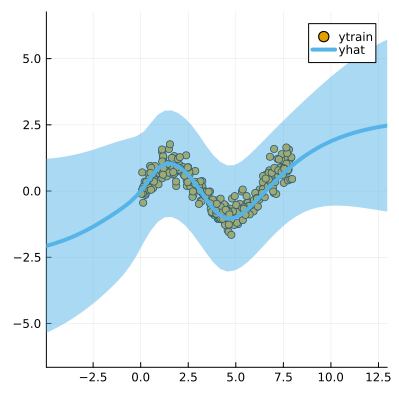

In [73]:
#| output: true

subset_w = :all
la = Laplace(nn; likelihood=:regression, subset_of_weights=subset_w)
fit!(la, (x, y))
plot(la, X, y; zoom=-5, size=(400,400))

In [66]:
Pkg.instantiate()

Precompiling project...
  ✗ LaplaceRedux
  0 dependencies successfully precompiled in 35 seconds. 221 already precompiled.
  1 dependency errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the package


In [ ]:
Pkg.precompile()

Precompiling project...
  ✗ LaplaceRedux
  0 dependencies successfully precompiled in 27 seconds. 221 already precompiled.



LoadError: The following 1 direct dependency failed to precompile:

LaplaceRedux [c52c1a26-f7c5-402b-80be-ba1e638ad478]

Failed to precompile LaplaceRedux [c52c1a26-f7c5-402b-80be-ba1e638ad478] to "/home/vd/.julia/compiled/v1.9/LaplaceRedux/jl_d8NFuL".
[91m[1mERROR: [22m[39mLoadError: ArgumentError: Package LaplaceRedux does not have MLUtils in its dependencies:
- You may have a partially installed environment. Try `Pkg.instantiate()`
  to ensure all packages in the environment are installed.
- Or, if you have LaplaceRedux checked out for development and have
  added MLUtils as a dependency but haven't updated your primary
  environment's manifest file, try `Pkg.resolve()`.
- Otherwise you may need to report an issue with LaplaceRedux
Stacktrace:
 [1] [0m[1mmacro expansion[22m
[90m   @[39m [90m./[39m[90m[4mloading.jl:1599[24m[39m[90m [inlined][39m
 [2] [0m[1mmacro expansion[22m
[90m   @[39m [90m./[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [3] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m./[39m[90m[4mloading.jl:1576[24m[39m
 [4] [0m[1minclude[22m[0m[1m([22m[90mmod[39m::[0mModule, [90m_path[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m./[39m[90m[4mBase.jl:457[24m[39m
 [5] [0m[1minclude[22m[0m[1m([22m[90mx[39m::[0mString[0m[1m)[22m
[90m   @[39m [35mLaplaceRedux[39m [90m~/Builds/navimakarov/LaplaceRedux.jl/src/[39m[90m[4mLaplaceRedux.jl:1[24m[39m
 [6] top-level scope
[90m   @[39m [90m~/Builds/navimakarov/LaplaceRedux.jl/src/[39m[90m[4mLaplaceRedux.jl:12[24m[39m
 [7] [0m[1minclude[22m
[90m   @[39m [90m./[39m[90m[4mBase.jl:457[24m[39m[90m [inlined][39m
 [8] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m./[39m[90m[4mloading.jl:2010[24m[39m
 [9] top-level scope
[90m   @[39m [90m[4mstdin:2[24m[39m
in expression starting at /home/vd/Builds/navimakarov/LaplaceRedux.jl/src/laplace.jl:6
in expression starting at /home/vd/Builds/navimakarov/LaplaceRedux.jl/src/LaplaceRedux.jl:1
in expression starting at stdin:2

Next we optimize the prior precision $P_0$ and and observational noise $\sigma$ using Empirical Bayes:

In [71]:
Pkg.resolve()

  No Changes to `~/Builds/navimakarov/LaplaceRedux.jl/dev/notebooks/batching/Project.toml`
  No Changes to `~/Builds/navimakarov/LaplaceRedux.jl/dev/notebooks/batching/Manifest.toml`


[ Info: Iteration 10: P₀=0.38801888579260724, σ=0.37820655863927616


loss(exp.(logP₀), exp.(logσ)) = 131.3055563159173
Log likelihood: -99.86566002091979
Log det ratio: 35.60668423951729
Scatter: 27.273108350477727
loss(exp.(logP₀), exp.(logσ)) = 136.63276178220295
Log likelihood: -109.60105403582219
Log det ratio: 40.608355788270075
Scatter: 13.45505970449144


[ Info: Iteration 20: P₀=0.19142729195802596, σ=0.2711522260853522


loss(exp.(logP₀), exp.(logσ)) = 124.95448942366279
Log likelihood: -98.65996239523834
Log det ratio: 43.73929364996542
Scatter: 8.849760406883489


[ Info: Iteration 30: P₀=0.12590696038320523, σ=0.37112717490481134


loss(exp.(logP₀), exp.(logσ)) = 121.77691663939211
Log likelihood: -95.51534336558217
Log det ratio: 45.265389521646625
Scatter: 7.257757025973275


[ Info: Iteration 40: P₀=0.10325727300248445, σ=0.34209052760770314


loss(exp.(logP₀), exp.(logσ)) = 122.27610395631007
Log likelihood: -95.99143058931537
Log det ratio: 45.744731124502664
Scatter: 6.824615609486718


[ Info: Iteration 50: P₀=0.0970949006151507, σ=0.3167934799539536


loss(exp.(logP₀), exp.(logσ)) = 121.79586218750774
Log likelihood: -95.51571838444525
Log det ratio: 45.67038982891563
Scatter: 6.889897777209342


[ Info: Iteration 60: P₀=0.09802368048344959, σ=0.3420981955854785


loss(exp.(logP₀), exp.(logσ)) = 121.5537085539113
Log likelihood: -95.28777879387201
Log det ratio: 45.38414807380883
Scatter: 7.147711446269764


[ Info: Iteration 70: P₀=0.1016916368940425, σ=0.3301151867329614


loss(exp.(logP₀), exp.(logσ)) = 121.53207939242962
Log likelihood: -95.27528049406035
Log det ratio: 45.087963721870665
Scatter: 7.425634074867868
loss(exp.(logP₀), exp.(logσ)) = 121.53410080865025
Log likelihood: -95.28021458625699
Log det ratio: 44.87526797976358
Scatter: 7.632504465022939


[ Info: Iteration 80: P₀=0.10564568669648461, σ=0.33154697465156074
[ Info: Iteration 90: P₀=0.10858886490924768, σ=0.3340310144815033


loss(exp.(logP₀), exp.(logσ)) = 121.5313408774625
Log likelihood: -95.27772608316984
Log det ratio: 44.764394762114705
Scatter: 7.742834826470629


[ Info: Iteration 100: P₀=0.11015855265322932, σ=0.3311327507895544


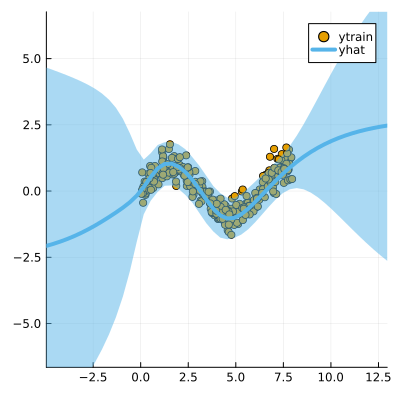

In [74]:
#| output: true

optimize_prior!(la; verbosity=1)
plot(la, X, y; zoom=-5, size=(400,400))

In [78]:
DataLoader((x, y))

300-element DataLoader(::Tuple{Vector{Float64}, Vector{Float64}})
  with first element:
  (1-element Vector{Float64}, 1-element Vector{Float64},)